In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\PRACHI TIWARI\OneDrive\Documents\Data_sales.csv", parse_dates=['Date'])
df.head()

,Date,Sales,Revenue,Marketing_Spend,Holiday,Year,Month,Day,Weekday,Temperature,Product_Type,Product_Price
0,2024-01-25,100,5000,1500,1,2024,1,25,1,5,Clothing,4000
1,2024-01-24,120,4000,2000,0,2024,1,24,1,4,Electronics,5000
2,2024-05-24,150,6000,1000,0,2024,5,24,5,8,Clothing,1000
3,2024-06-13,100,7000,3000,0,2024,6,13,6,66,Clothing,4000
4,2024-05-03,120,2000,500,1,2024,5,3,5,41,Electronics,5000


In [3]:
df.isnull().sum()

Date               0
Sales              0
Revenue            0
Marketing_Spend    0
Holiday            0
Year               0
Month              0
Day                0
Weekday            0
Temperature        0
Product_Type       0
Product_Price      0
dtype: int64

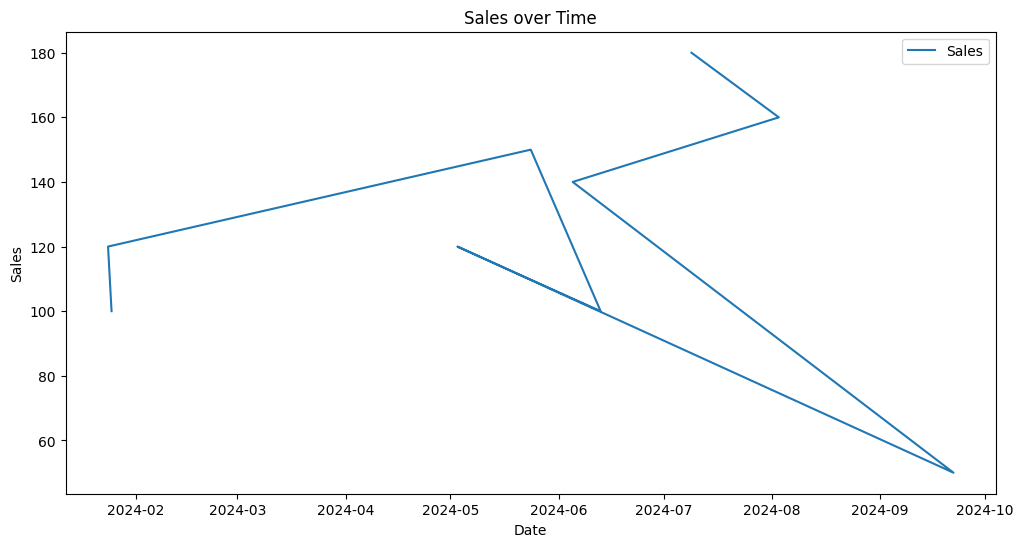

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.legend()
plt.show()

In [5]:
print(df.dtypes)


Date               datetime64[ns]
Sales                       int64
Revenue                     int64
Marketing_Spend             int64
Holiday                     int64
Year                        int64
Month                       int64
Day                         int64
Weekday                     int64
Temperature                 int64
Product_Type               object
Product_Price               int64
dtype: object


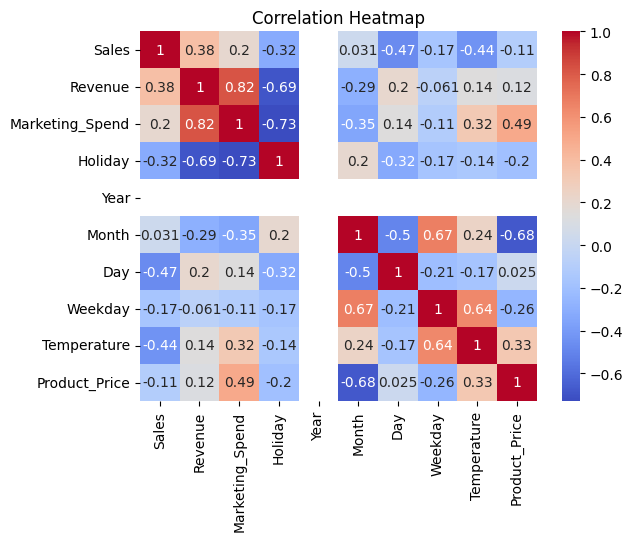

In [6]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

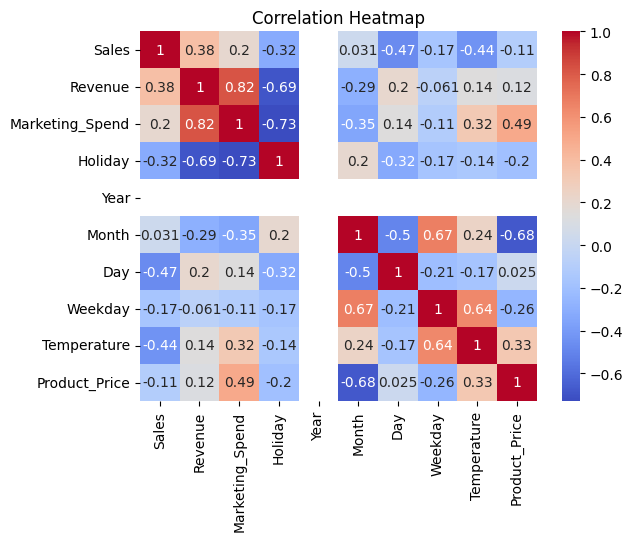

In [7]:
numeric_df = numeric_df.fillna(0)  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

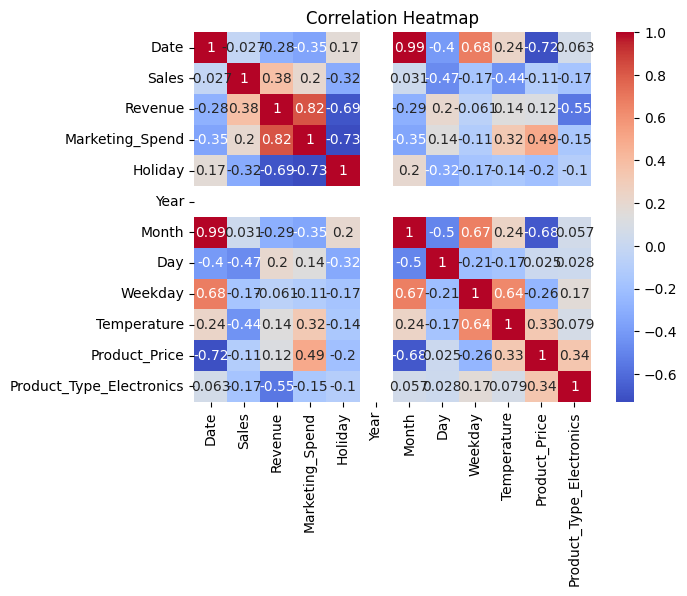

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True) 
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

df['Marketing_Spend'] = df['Marketing_Spend']


In [10]:
import statsmodels.api as sm

In [11]:
df.set_index('Date', inplace=True)

In [12]:
model = sm.tsa.ARIMA(df['Sales'], order=(5, 1, 0))  
result = model.fit()

C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has

In [13]:
forecast = result.forecast(steps=12)
print(forecast)

9     179.999996
10    179.999983
11    179.999991
12    179.999993
13    179.999995
14    179.999995
15    179.999995
16    179.999995
17    179.999995
18    179.999995
19    179.999995
20    179.999995
Name: predicted_mean, dtype: float64


C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
X = df[['Year', 'Month', 'Day', 'Weekday', 'Marketing_Spend']]  # Add more features as needed
y = df['Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [17]:
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5


In [19]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 19.799999999999997
Mean Squared Error: 474.8500000000001
Root Mean Squared Error: 21.79105320997588


In [20]:
future_features = pd.DataFrame({
    'Year': [2025, 2025],  # Example: next years
    'Month': [1, 2],       # Example: next months
    'Day': [1, 1],
    'Weekday': [0, 1],
    'Marketing_Spend': [10000, 12000]
})

future_predictions = model_rf.predict(future_features)
print(future_predictions)


[131.5 131.5]
